# 7. 金融智能体

对于金融市场的描述和单摆车有所不同。对于单摆车的描述，仅用位移，速度，角度和角速度四元组就比较充分。而金融市场整合了所有投资者的心理，相对复杂。有很多描述方法对其进行描述，比如，按照经济周期不同阶段分类，可将金融市场分为蓬勃发展期，高速发展期，衰落期以及萧条期；按照公司的盈利模式对比，可分为每股营收（EPS）超过分析师预期，等于分析师预期或小于分析师预期；按照行业分类，分为（个股）处在初创期，高速发展期，成熟期，衰退期，等等。最常见也最容易理解的是依据价格的变化模式，对金融市场进行状态分类。比如可将市场分为当天收盘价格在长期均线之上，相等或在长期均线之下的状态，分别预示着上涨，整理和下跌状态。

在这一部分中，我们将使用历史价格作为金融智能体判断市场状态的依据。使用历史价格可以将金融市场的状态进行简化，使得此问题更加接近于单摆车问题。在单摆车问题中， 我们是用状态四元组来表示小车的状态；用向左0或者向右1来表示智能体能够执行的动作。相似地，我们可以用过去四天的收盘价来表示当前金融市场的状态，用买入1或者卖出0来表示金融智能体即将要执行的动作。小车的目标是长期回报率累加最大化，金融智能体的目标同样也是。

## 7.1 强化学习在金融领域的应用

强化学习在金融领域的应用虽一直被业界和学界看好，但是成功案例目前大部分只集中在学界，在业界的应用案例并不多，鲜有对冲基金声明其用过强化学习作为主要优化方法。詹姆斯·西蒙的大奖章基金曾被传言大量使用过强化学习作为优化方法，而且取得了很显著的绩效。牛津大学的学者Ben Hambly, Renyuan Xu 和 Huining Yang在2021年底发表的文章指出，强化学习在金融领域的应用主要分为以下七个方面：

+ 电子订单市场与市场微观结构 (Electronic Markets and Market Microstructure)

+ 优化执行 (Optimal Execution)

+ 投资组合优化 (Portfolio Optimization)

+ 期权定价以及对冲 (Option Pricing and Hedging)

+ 做市 (Market Making)

+ 智能投顾 (Robo-advising)

+ 智能订单路径匹配 (Smart Order Routing)

从Hambly, Xu and Yang (2021)的分类中，我们可以看到，大部分强化学习的金融应用集中在市场微观结构上。市场微观结构（market microstructure）指的是在现价订单簿的订单结构排布、订单撮合/匹配机制、后续走势推演、以及做市商做单规则及其优化逻辑，当然在订单层排布结构中还包含投资这类型以及对于极端事件的反应情况。投资组合优化、期权定价以及智能投顾，则涉及到市场状态的认知和优化目标的界定。在此课程中，我们只关注优化执行这一分支，即根据市场状态的判断，来调整多空执行策略。


## 7.2 强化学习的金融学应用原理----历史可以重演，投资者应汲取教训


   行为金融学认为投资者对市场的反应决定了股票的价格，经常观察现价订单簿的变化行为的有经验的交易员也持有同样的观点。价格是由买卖双方形成的交易得到，也就是订单的匹配之后来确定的。如果投资者只有观点，没有实际的交易行为，则不构成价格的形成，也不构成现价订单簿上的订单变化和后续的影响。投资者的行为受到消息的影响，好消息会促使更多的投资者加入买方阵营，提交买入订单进而推高股价；卖方投资者同样会根据到达市场中的坏消息判断未来个价格变化，提交卖出订单。我们可以认为买方和卖方同时作用于市场，对后续的价格走势产生着影响。
   
   传统的金融学理论有效市场假说（Efficient Market Hypothesis, EMH）认为价格及时反应所有的消息，所有的投资者也一致地按照消息所暗示的方向执行投资决策。虽然EMH是投资界的理论支柱, 但其有很多弱点，也饱受诟病。其中一个弱点就在于投资人能够“同时”接收到信息，并且对信息的理解也是相同的，进而做出同样的反应，最终导致了信息的“有效性”，学界把投资者的统一行为称为“投资者的同质性（investors' homogeneity）”。
   
   然而，市场中投资者是不同的个体，消息不可能在所有情况下都非常平均地“映入所有投资者的眼帘”，达到“信息有效”的效果，而是渐进传导到每一个投资者。不同消息的传递速度不尽相同，投资者们也无法完全相同地理解同一条信息，更无从对同一条信息所暗示的内容做出相同的投资动作。市场中的投资者是异质的（heterogeneous），而非同质的。换句话说，有效市场假说是一个极度完美的市场假设下的产物，在真实世界里，并不完美地存在。

   那么真实金融市场是怎样的呢？假设投资者会对信息有所反应，但这个反应不是同时发生的，而是间隔开来的，那么先反应的人将自己的行为体现在股价上，后反应的人又将行为体现在股价上，那么股价或回报率的时间序列就能够反映出这个“渐进式”的投资者行为，我们就可以依据这个已经反应在股价行为的时间序列来预测未来的价格。这个“渐进”的消息传递过程（gradual process）符合了人们对真实情况的认知。
   
   价格表征了市场中的信息，信息渐进地传递，所以价格的形成模式（pattern）表征了信息传递的模式。如果信息传递的模式呈现“历史会重演”，也就是人们理解信息的过程总是和过去有相似性，则可以使用这个价格所呈现出来的模式来预测未来的价格。当然，在这里我们认为投资者的群体行为是不随着时间的变化而变化的，即，投资者过去的行为在未来也会重演。马克·吐温有句名言“历史会重演，但不是简单地重复”。既然历史不是简单的重复，就有其相对的变化，对金融学的建模应该忽略其相对微小的变化，从而捕捉更能够体现大部分投资者的群体性为，这就是历史的重演。
   
   历史重演时，投资者应该怎样做呢？应该从过去的经验中汲取教训。过去的教训是历史重演时，系统呈现出状态的重现，投资者做出的动作会得到延迟的回报。而最大化这个延迟的回报的加总，就是金融交易的终极目的，这也是强化学习在金融交易中的理论所在。


## 7.3 简单金融智能体

【实验概述】

+ 在之前的单摆车实验中，环境的状态是由位移，速度，角度和角速度组成的四元组构成，可以看做是一个四维向量，而动作由0和1构成。在金融案例中，我们可以同样仿照单摆车实验，**用过去四天的收盘价，构成一个新的四元组，形成对应的状态描述**；相应的，使用做多1和做空0来对应智能体应该执行的动作。这样，我们将金融智能体和单摆车实验完美地结合起来，利用深度神经网络将强化学习的思路复制。


【实验目的】

+ 进一步了解深度强化学习的逻辑，熟悉代码编写结构

+ 仿照单摆车案例，编写金融案例，实现状态-动作对应

+ 使用单摆车的优化方法，优化金融案例

【实验步骤】

+ 逐行键入以下代码，深刻理解函数之间的勾稽关系

+ 修改参数，如标的、回报计算方法、状态等变量，观察总回报的变化


In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4,suppress=True) #将打印格式设置为4位小数和不用科学计数法显示

import gym 

# 以下的导入库是Keras常用操作
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import accuracy_score

from collections import deque #双向队列用于存储有限记忆，目的是只关注最后2000次的记忆

2023-06-26 12:03:17.129832: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# import yfinance as yf

# usdcny = yf.download('CNY=X')
# usdcny.to_csv('usdcny.csv')
# usdcny.tail()
usdcny = pd.read_csv('usdcny.csv')

In [3]:
# 创建状态类，定义状态空间，只包含状态个数，此定义将仿照单摆车实验定义过去4天的收盘价为状态描述
class observation_space:
    def __init__(self, n):
        self.shape = (n,)

In [4]:
# 定义动作空间类，动作空间包含n个动作，其方法sample()从n个动作中随机抽取。在金融案例中，有两个选择做多1和做空0
class action_space:
    def __init__(self, n):
        self.n = n
    def seed(self, seed):
        pass
    def sample(self):                #随机决定做多或做空，这里注意np.random和random.randint(a,b)取值范围有所不同。random.randint
                                     #属于python内置函数，默认左闭右开区间，不包含b
        return random.randint(0, self.n - 1)

In [5]:
#导入随机函数库， 并且定义各个相关库中的随机种子
import random

def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    env.action_space.seed(seed)

In [6]:
# 定义金融类

class Finance:
    filepath = 'usdcny.csv'
    def __init__(self, symbol, features):
        self.symbol = symbol                  #设置标的物代码(ticker)，可以换成csv文件中的其他标的，SPY，VIX，GLD等
        self.features = features              #设置特征
        self.observation_space = observation_space(4) #定义一个状态空间，调用一开始定义的observation_space类，只有四个元素
                                                        #这里需要注意状态空间>=观测空间
            
        self.osn = self.observation_space.shape[0]      #获得状态空间的维度,  在这个实例中是4。osn 全称为 observation number 
                                                        #注意osn在此例中是4，可以扩展到其他数目
        self.action_space = action_space(2)             #动作空间，只有两个元素，调用了action_space类
        self.min_accuracy = 0.475    #设置最小准确率，准确率定义为total rewards/total number of steps
        self._get_data()             #读取数据方法
        self._prepare_data()         #准备数据方法
        
    def _get_data(self):                    #读取数据方法。一般情况下，在类中不将数据读取和处理写在构造函数中，写在方法中
        self.raw = pd.read_csv(self.filepath, index_col=0,
                               parse_dates=True).dropna()
        
    def _prepare_data(self):       #准备数据。完成以下任务：提取源文件中的指定列，计算日回报率，标准化回报率及价格，匹配涨跌
        self.data = pd.DataFrame(self.raw[self.symbol])   #获取数据帧中的一列标的物
        self.data['r'] = np.log(self.data / self.data.shift(1))  #计算回报率。shift(1)将价格向下移动一个单位，这是个普遍的写法
        self.data.dropna(inplace=True)             #除去空行。覆盖原数据帧
        self.data = (self.data - self.data.mean()) / self.data.std()   #将数据标准化：每个值减去均值后除以标准差，此过程是进入机器学习
                                                                        #模型的必备过程
            
        self.data['d'] = np.where(self.data['r'] > 0, 1, 0)  #回报率>0，当天上涨，d为1; 此外当天下跌，d为0 
                                                            #np.where 相当于 if else 
        
        #将回报率是否大于0用作策略的依据。但是有可能产生一个问题：将回报率标准化以后，可能会导致一些小的负回报率减去一个更小的回报率均值
        #使得本来是负回报率变为正回报率了，从而导致做多做空的错误。这个位置值得借鉴。
    
    
    def _get_state(self):      #获取状态，过去四天的收盘价，对数据帧做切片，每次切4行数据，混动执行
        return self.data[self.features].iloc[self.bar - self.osn : self.bar].values
    
    #注意此位置定义了系统状态：从self.bar-self.osn到self.bar
    #这个位置跟回测有关。当i逐渐增加时，从i到i-4的位置都是状态
    
    
    
    def seed(self, seed=None):
        pass 
    #可以如上定义seed函数
    
    
    
    
    def reset(self):                        #reset方法仿照单摆车的reset方法，重置以下变量
        self.treward = 0    #总回报=0    
        self.accuracy = 0   #准确率=0
        self.bar = self.osn            #self.bar初始值是4（observation space），后续有增量，其表示的是第几根K线图
        state = self.data[self.features].iloc[(self.bar - self.osn) : self.bar] #注意 - 和 ：的优先级，状态为self.bar到self.bar向前4天
        return state.values        #返回数组，dataframe.values返回数组np.array
    
    def step(self, action):               #step表示时步，即往前一天或者一小时或者一分钟等，取决于回测频率是多少
                                          #单摆车实验中，每执行一次动作为一个时步；金融案例中，每回测一天为一个时步 
                                          #action从DQLAgent的act（）方法返回
                                          
        correct = action == self.data['d'].iloc[self.bar]  #注意此位置的结构，表示如果action==self.data['d'].iloc[self.bar]
                                                            #correction为1，否则为0
                                                           #此位置correct的作用是判断输入的动作与实际的涨跌（用d表示）是否一致
        reward = 1 if correct else 0                       #如果一致，则reward=1，否则=0  
        self.treward += reward          #更新总回报
        self.bar += 1       #回测控制变量增加1    
        self.accuracy = self.treward / (self.bar - self.osn)  #准确度表示随机抽取的动作与实际情况的比较
        
        #接下来定义停止条件：done==True停止，done==False可以继续执行
        
        if self.bar >= len(self.data):      #回测到最后一步停止
            done = True
        elif reward == 1:            #回报为1时，回测继续进行
            done = False
        elif (self.accuracy < self.min_accuracy and            #回测了10根bar以后,如果准确率小于最小准确率（0.475）则触发停止条件
              self.bar > self.osn + 10):
            done = True
        else:                                    #其他情况继续执行
            done = False
        
        #如果没有触发停止条件，则可以继续进行
        # Return next state date, the next state is controled by self.bar
        #, Return reward
        state = self._get_state()                    #为下次回测准备
        info = {}                                    #信息可以用来存储一些信息，每一次的状态，动作以及其他变量在不同时刻的情况
        return state, reward, done, info             #最终返回四元组，返回值与单摆车一样

以上代码较为复杂，需要仔细阅读。接下来将类实例化：

In [7]:
#导入相关库
import gym
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [8]:
#实例化金融类，此位置和上一部分中的env=gym.make('CartPole-v0')一样，仿照单摆车创建环境
#第一个参数为symbol, 第二个为feature 
env = Finance('Adj Close', 'Adj Close')

In [9]:
#查看原始数据
env.raw

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-25,8.2767,8.2868,8.2667,8.2768,8.2768,0
2001-06-26,8.2768,8.2868,8.2668,8.2768,8.2768,0
2001-07-02,8.2767,8.2870,8.2667,8.2770,8.2770,0
2001-07-09,8.2768,8.2868,8.2667,8.2767,8.2767,0
2001-07-11,8.2769,8.2870,8.2669,8.2769,8.2769,0
...,...,...,...,...,...,...
2023-06-20,7.1604,7.1823,7.1600,7.1604,7.1604,0
2023-06-21,7.1808,7.1963,7.1776,7.1808,7.1808,0
2023-06-22,7.1784,7.1786,7.1784,7.1784,7.1784,0


In [10]:
#查看状态空间
env.observation_space.shape[0]

4

In [11]:
# reset以数组形式返回state.values
env.reset()

array([1.7976, 1.7978, 1.7974, 1.7977])

In [12]:
#初始bar为4，即开始时间向后推4个时间
env.bar

4

In [13]:
#查看指定标的数据
env.data.tail()

,Adj Close,r,d
Date,,,
2023-06-20,0.236746,1.817115,1
2023-06-21,0.265267,1.065119,1
2023-06-22,0.261912,-0.114364,0
2023-06-23,0.262052,0.014824,1
2023-06-25,0.260933,-0.031705,0


In [14]:
#4个收盘价为状态，依次向后推
env._get_state()

array([1.7976, 1.7978, 1.7974, 1.7977])

In [15]:
# 随机抽取动作空间
a = env.action_space.sample()
a

1

In [16]:
# 模拟时间步长函数
env.step(a)

(array([1.7978, 1.7974, 1.7977, 1.7974]), 1, False, {})

In [17]:
set_seeds(100)

In [18]:
class DQLAgent:
    def __init__(self, gamma=0.95, hu=24, opt=Adam, lr=0.001, batch_size=32,finish=False):
        self.finish = finish 
        #控制变量，在learn方法中，定义每一回合执行动作5000次，如果设置回报达到195则认为此回合成功，提前终止训练，
        #此变量控制是否可以提前结束
        
        self.epsilon = 1    #探索概率，后续有逐渐衰减的过程
        self.epsilon_min = 0.01    #探索概率衰减的最小值
        self.epsilon_decay = 0.995  #探索概率衰减值
        
        self.gamma = gamma           #回报贴现率/折扣率
        
        self.batch_size = batch_size         #进入神经网络的批次数量
        
        self.max_treward = 0         #设置最大总回报
        self.averages = list()       #存储平均回报
        
        self.memory = deque(maxlen=2000)  
        #deque是一种双向队列，可以理解为长度有限的数组，可在左侧或者右侧来推入数据时保持数组长度不变
        #双向队列对于存储临时数据或时间序列数据很有效，可以仅仅考虑近期数据，而不考虑远期数据
        
        self.osn = env.observation_space.shape[0] 
        #获取初始状态空间的元素数量，此例中为4
        #类被实例化之前，需要将env定义好（金融案例中还会遇到这个问题）
        
        self.model = self._build_model(hu, opt, lr) 
        #定义估计模型，为_build_model()函数中所指定的深度神经网络，hu=hidden units
        #注意：类声明中，构造函数包含方法，声明时即被执行
        
    def _build_model(self, hu, opt, lr):           #深度神经网络模型，与上一例有所不同，上例是用来估计动作，此例用来估计Q值
        model = Sequential()
        
        model.add(Dense(hu, input_dim=self.osn,    #建立输入层，input_dim这个位置必须给与足够重视，它表示输入的数据的维度，
                        activation='relu'))        #实际搭建神经网络尽量避免；神经网络第一个add方法加入了输入层和第一个隐藏层
                                                    #self.osn=4,表示有四个变量作为输入，输入维度为4；四个变量 对应小车的状态四元组
        
        model.add(Dense(hu, activation='relu'))             #加入第二隐藏层
        
        model.add(Dense(env.action_space.n, activation='linear'))   
        #加入输出层，动作空间action_space.n=2，这的目的是预测两个变量0或者1代表的Q值
        #会选择值较大的作为估计器，所以输出值为不懂动作下（0或1）的Q值
            
        model.compile(loss='mse', optimizer=opt(learning_rate=lr))  
        #编译深度神经网络，指定损失函数和优化方法；MSE均方误差为回归问题
        return model
        
    def act(self, state):
        if random.random() <= self.epsilon:        #random.random()用于生成一个0到1的随机符点数，epsilon用于定义探索概率
            return env.action_space.sample()       #返回动作空间的随机抽样，动作空间只有0和1.
                                                    #此过程为探索过程
            
        action = self.model.predict(state, verbose = False)[0]       #调用_build_model()中所建立的深度神经网络模型进行预测
                                                    #注意，此位置输出为两个数，env.action_space.n=2,需要选择最大的那个，
                                                    #[0]将二维数组变为一维数组，将[[a,b]]降维成[a,b]。a,b表示动作0,1对应的Q值
                                                                                                         
        return np.argmax(action)             #np.argmax返回一个数组中最大值的索引值。最大值出现多次时，返回第一个最大值的索引值。
                                     #此处与NNAgent.act有所不同
    
    def replay(self):  
        
         #经验回放函数从memory里随机抽取batch_size个样本，默认32，进行神经网络预测
        batch = random.sample(self.memory, self.batch_size)                
        
        for state, action, reward, next_state, done in batch: #对于memory中所有的数据，进行遍历;
                                                               #注意此位置必须加入next_state以确保神经网络能够捕捉到“延迟的回报”
                                                               #此处是DQLAgent与NNAgent的显著区别
                                                               #延迟的回报是由一下model.predict预测数来的
            if not done: #对成功的动作进行遍历
                reward += self.gamma * np.amax(self.model.predict(next_state, verbose = False)[0])   
                #Q学习公式：reward=reward+gamma*神经网络的预测值
                #np.amax（等价于np.max）返回数组中的最大值
            
            target = self.model.predict(state, verbose=False)             #目标为神经网络的预测
            target[0, action] = reward
                #注意此位置target为列表二元组，第一个元素为状态（状态自身为四元组），第二个元素为带有折扣的回报
            
            self.model.fit(state, target, epochs=1,verbose=False)   #训练过程
        
        if self.epsilon > self.epsilon_min:       #调整探索概率，逐渐递减
            self.epsilon *= self.epsilon_decay
    
    
    
    
    def learn(self, episodes):              #learn函数是学习过程的核心，接收一个参数episodes回合
                                            #学习过程，和之前的神经网络一样
                                            #注意此函数是深度强化学习的学习函数，将在后续的金融实例中使用
            
        trewards = []                       #定义总回报列表，记录每一回合学习结果
        
        for e in range(1, episodes + 1):     #循环重复episodes次
            
            state = env.reset()               #重置环境变量，注意初始的状态维度为：(4,)
            
            state = np.reshape(state, [1, self.osn])   #将收集到的状态变量进行展平：[位移，速度，角度，角速度]，展平成[[1,4]]数组
            
            for _ in range(200):             #定义5000次，之前是200次
                
                action = self.act(state)      #调用类中的act()函数，函数返回随机动作或者由深度神经网络预测出来的最大Q值的动作
                
                next_state, reward, done, info = env.step(action)  #调用env.step()函数，返回执行动作后的状态，回报，done，info
                
                next_state = np.reshape(next_state,[1, self.osn]) 
                #目的是将next_state在后续作为新的训练集输入给神经网络
                #将新状态展平：[位移，速度，角度，角速度]，维度1*4
                
                self.memory.append([state, action, reward, next_state, done]) 
                #将当前状态，动作，回报，下一个状态，done储存给memory
                #memory记忆体用于神经网络预测，注意记忆体是个只能存2000组数据的双向队列,append从右侧推入
                    
                state = next_state   
                #变量state用于存储“当前”状态，即执行动作完成以后，新状态仍然存储在state里面，next_state只用于过渡
                
                if done:          #如果中间有一次失败，即done=True
                    
                    treward = _ + 1            #treward总回报=循环次数+1，表示此回合结束以后总回报是多少
                    
                    trewards.append(treward)   #将总回报treward插入所有回合的总回报列表trewards中， 注意trewards是在循环外声明的列表，
                                               #treward为刚刚声明的临时变量
                    
                    av = sum(trewards[-25:]) / 25              
                    #计算最后25个总回报的均值，目的是看随着回合数的增加，看最后25回合的平均回报是否增加，也就是学习能力是否有提升
                    
                    self.averages.append(av)                    #将最后25个总回报的均值均值计入averages列表，averages为全局变量
                    
                    self.max_treward = max(self.max_treward, treward) 
                    #检查当前回合中最大总回报是否与当次相同，如果当次高则更新最大总回报
                    
                    templ = 'episode: {:4d}/{} | treward: {:4d} | '   
                    templ += 'av: {:6.1f} | max: {:4d}'
                                    
                    print(templ.format(e, episodes, treward, av,
                                       self.max_treward), end='\r')   #打印回合进程
                    break
            
            if av > 195 and self.finish:      #如果平均回报大于195,且实例化时如果指定finish=True时，提前结束训练
                break
                
            if len(self.memory) > self.batch_size:    #如果记忆体数目大于batch_size(32),执行经验回放函数
                self.replay()                          
                
    
    
    def test(self, episodes):              #测试函数，测试函数没有探索，只有利用。和实际应用中的一样；神经网络已经训练完不再训练
        trewards = []
        for e in range(1, episodes + 1):
            state = env.reset()
            for _ in range(201):
                state = np.reshape(state, [1, self.osn])
                action = np.argmax(self.model.predict(state, verbose=False))  #选择深度网络预测值中最大的索引作为动作
                next_state, reward, done, info = env.step(action)
                state = next_state
                if done:
                    treward = _ + 1
                    trewards.append(treward)
                    print('episode: {:4d}/{} | treward: {:4d}'
                          .format(e, episodes, treward), end='\r')
                    break
        return trewards

In [19]:
#注意此位置调用了单摆车中的DQLAgent函数
agent = DQLAgent(gamma=0.5, opt=RMSprop)

2023-06-26 12:03:27.565487: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
episodes = 100

In [21]:
%%time 
# relu + mse in the NN model setting slow down the training process, so that the learning-process is really time consuming
agent.learn(episodes)

CPU times: user 8min 3s, sys: 26.7 s, total: 8min 30s  116
Wall time: 8min 18s


In [22]:
#调用DQLAgent的test方法
agent.test(3)

[]

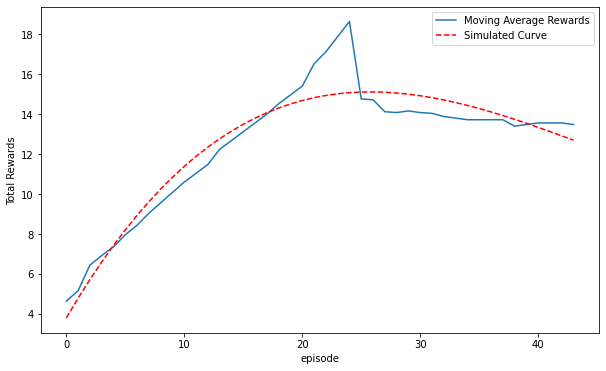

In [23]:
plt.figure(figsize=(10, 6))
x = range(len(agent.averages))
y = np.polyval(np.polyfit(x, agent.averages, deg=3), x)
plt.plot(agent.averages, label='Moving Average Rewards')
plt.plot(x, y, 'r--', label='Simulated Curve')
plt.xlabel('episode')
plt.ylabel('Total Rewards')
plt.legend();

In [43]:
# 保存训练好的模型
save_model_name='Finance_model-'+str(episodes)+'.h5'
agent.model.save(save_model_name)

## 7.4 实验总结

在7.3的实验中，我们定义了简单的金融智能体类。简单的金融智能体获取外汇（EURUSD）的日线图收盘价格，将系统的状态定义为过去4天的价格组合，形成了状态空间, 此状态空间和单摆车智能体的状态空间相似；对于强化学习中用到的动作空间，定义上涨为1，下跌为0，形成动作空间。

其学习的过程就是使用了在6.2中的深度神经网络。回顾一下这个深度神经网络智能体DQLAgent，他的学习过程是在给定回合数量episodes和优化目标treward的情况下，通过Act函数中的神经网络，包含探索与利用，不断迭代能够使treward最大化的过程。由于系统状态为非离散数据，此过程使用了深度网络作为Q表的估计器。虽然最初应用到单摆车目标上，但是此优化逻辑颇为普遍，能够使用的范围也非常广泛。

我们定义的Finance类就是重新定义了环境，其中也包含<font color=#FF9900> reset()</font> 重置和step时步函数，从而将单摆车实验转换为以最后四天为状态描述的金融问题。强化学习的过程，也就是深度神经网络创建Q表的过程，仍然使用DQLAgent的<font color=#FF9900> learn()</font> 方法。

在此实验中，我们仍然使用DQLAgent中<font color=#FF9900> learn()</font> 函数对金融智能体进行强化学习，得到了类似的效果。对于7.3中的实验，只用过去4天收盘价作为状态描述未免过于简单。外汇市场结合了全球的投资者，是个异常复杂的系统。使用更加复杂的变量描述系统状态，既是必要又符合实际情况。我们将在下一个案例中，更加丰富金融类Finance的结构编写，同时丰富DQLAgent，使其更具实操性。


---
# 8 深度强化学习：改进的金融智能体

## 8.1 实验：改进的金融智能体

【实验概述】

+ 7.3中的Finance类使用了“过去”四天的收盘价作为状态描述变量，其在状态的结构上的描述似乎过于简单。本质上讲，对金融市场状态的定量描述本身就是个仁者见仁智者见智的事情，很多情况下，很难用简单或者复杂来衡量变量的合理性。其实，由于金融市场的易变性，这个所谓的合理本身就值得商榷。但是，我们仍然可以用更加丰富的方法来对状态进行描述，目的是更好地复刻程序设计者对金融市场的理解。

【实验目的】

+ 进一步了解深度强化学习的逻辑，熟悉代码编写结构

+ 仿照单摆车案例，编写金融案例，实现状态-动作对应

+ 使用单摆车的优化方法，优化金融案例

+ 深刻理解<font color=#FF9900> reset()</font> 方法以及<font color=#FF9900> step()</font> 方法，了解其在强化学习中的作用

+ 仿照本案例，能够写出类似的算法，重置状态以及时间步长

【实验步骤】

+ 逐行键入以下代码，深刻理解函数之间的勾稽关系

+ 修改参数，如标的、回报计算方法、状态等变量，观察总回报的变化

In [28]:
class Improved_Finance:
    url = 'usdcny.csv'
    
    def __init__(self, symbol, features, window, lags,
        leverage=1, min_performance=0.85,
        start=0, end=None, mu=None, std=None):         #加入可变动的滑动窗口，滞后阶数，杠杆
                                                        #min_performance表示最大亏损额为15%
        
        
        self.symbol = symbol
        self.features = features             #用于定义特征
        self.n_features = len(features)       #特征数目
        self.window = window                 #滑动窗口大小
        self.lags = lags                     #滞后阶数，后续设置为5，可自行修改  
        self.leverage = leverage             #定义杠杆率 
        self.min_performance = min_performance  #定义最小绩效
        self.start = start          #定义开始位置，每次向前数多少跟bar作为状态衡量
        self.end = end              #定义结束位置 
        self.mu = mu
        self.std = std
        self.observation_space = observation_space(self.lags) #此位置已经将观测空间设置为lags
        self.action_space = action_space(2)        #金融案例动作一般情况下分为做多，做空和等待；实际情况关于做多、做空位置还可细分
        self._get_data() #获取数据
        self._prepare_data() #处理数据
        
    def _get_data(self):
        self.raw = pd.read_csv(self.url, index_col=0,parse_dates=True).dropna()
        
    def _prepare_data(self):
        self.data = pd.DataFrame(self.raw[self.symbol])
        self.data = self.data.iloc[self.start:]
        self.data['r'] = np.log(self.data / self.data.shift(1))
        self.data.dropna(inplace=True) #算完回报率将第一天剔除
        self.data['s'] = self.data[self.symbol].rolling(self.window).mean()    #计算过去滑动窗口（10）内的收盘价均值，简单10日移动平均线
        self.data['m'] = self.data['r'].rolling(self.window).mean()            #计算滑动窗口（10）内的回报率均值   
        self.data['v'] = self.data['r'].rolling(self.window).std()             #计算滑动窗口（10）内的回报率标准差，波动率
        self.data.dropna(inplace=True) #一般情况下算完每一个指标后进行NA剔除，但实际情况为了节省有用数据，以及将所有指标算完以后整体剔除NA
        
        
        
        if self.mu is None:                         #设置一个均值变量
            self.mu = self.data.mean()
            self.std = self.data.std()
        self.data_ = (self.data - self.mu) / self.std  #标准化，也可引用sklearn.preprocessing.standardscalar()
        
        
        self.data_['d'] = np.where(self.data['r'] > 0, 1, 0)   
        self.data_['d'] = self.data_['d'].astype(int)          #强制转换成整数类型，防止有时候d是小数
        
        
        if self.end is not None: #将原数据分成训练集与验证集
            self.data = self.data.iloc[:self.end - self.start]
            self.data_ = self.data_.iloc[:self.end - self.start]
            
    def _get_state(self):
        return self.data_[self.features].iloc[self.bar -self.lags:self.bar]
    #将状态定义为从当前bar开始向前数lags根的所有特征features
    
    def seed(self, seed):
        random.seed(seed)
        np.random.seed(seed)
        
    def reset(self): #重置状态
        self.treward = 0
        self.accuracy = 0
        self.performance = 1
        self.bar = self.lags
        state = self.data_[self.features].iloc[self.bar-self.lags:self.bar]  #切片，bar-lags到bar，一共有lags根蜡烛图
        return state.values
    
    
    def step(self, action):              #定义时步函数, input action ={0,1}
        import math
        
        correct = action == self.data_['d'].iloc[self.bar]  #correct 返回True or False 
        
        ret = self.data['r'].iloc[self.bar] * self.leverage  #计算带有杠杆的当天回报
        reward_1 = 1 if correct else 0                       #reward_1记录是否预测正确
        reward_2 = abs(ret) if correct else -abs(ret)        #reward_2记录按照预测的情况下真实回报率
        factor = 1 if correct else -1                   #可以记录其他因素，后来没有用到
        
        self.treward += reward_1       #做单方向作对多少次
        self.bar += 1                  #回测增量
        self.accuracy = self.treward / (self.bar - self.lags)   #计算准确率
        self.performance *= math.exp(reward_2)            #计算连续复利回报率
        
        
        #接下来设置回合终结条件
        if self.bar >= len(self.data):
            done = True
        elif reward_1 == 1:
            done = False
        elif (self.performance < self.min_performance and self.bar > self.lags + 5):    #如果绩效小于最小要求绩效（0.85）且时步执行五次以上
            done = True
        else:
            done = False
            
            
        state = self._get_state()  #重新获得状态，此时状态已经通过self.bar += 1 更新
        info = {}                    
        return state.values, reward_1 + reward_2 * 5, done, info #此位置的reward_1 + reward_2 * 5作为Q表更新公式

In [81]:
env = Improved_Finance('Adj Close', ['Adj Close', 'r'], 10, 5)

In [82]:
from collections import deque #双向队列用于存储有限记忆，目的是只关注最后2000次的记忆
import random

# 以下的导入库是Keras常用操作
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import accuracy_score

a = env.action_space.sample()
a

0

In [83]:
env.reset()

array([[ 1.8041,  0.0141],
       [ 1.8045,  0.0231],
       [ 1.8038, -0.0127],
       [ 1.8038,  0.0097],
       [ 1.8043,  0.0231]])

In [33]:
import math
env.step(a)

(array([[ 1.8045,  0.0231],
        [ 1.8038, -0.0127],
        [ 1.8038,  0.0097],
        [ 1.8043,  0.0231],
        [ 1.8043,  0.0097]]),
 1.0,
 False,
 {})

## 8.2 实验总结

我们来比较一下两个金融智能体和单摆车智能体。在单摆车实验中，智能体的动作由env.step()函数执行，返回下一个状态等四元组，也就是状态受到动作的影响，动作决定下一个时刻的状态。而在金融智能体案例中，智能体的动作不影响状态，状态已经固定，是由市场行情的价格数据来决定的。智能体通过学习决定怎样来优化地选择动作，目的当然还是是最终回报最大化。

## 8.3 实验：基于强化学习的智能交易机器 (Trading Bot)

【实验概述】

+ DQLAgent类中使用了带有经验回放的深度学习网络来估计不同状态下的Q值，在实际情况下，可能产生更加复杂的学习过程。本实验通过改进DQLAgent，实现更加接近现实的强化学习过程。

【实验目的】

+ 进一步了解深度强化学习的逻辑，熟悉代码编写结构

+ 重新编写带有经验回放的深度强化学习过程

+ 重新编写<font color=#FF9900> reset()</font> 方法以及<font color=#FF9900> step()</font> 方法，明确其在强化学习中的作用


【实验步骤】

+ 逐行键入以下代码，深刻理解函数之间的勾稽关系

+ 修改参数，如标的、回报计算方法、状态等变量，观察总回报的变化


In [56]:
class FQLAgent:
    def __init__(self, hidden_units, learning_rate, learn_env, valid_env):
        self.learn_env = learn_env   #训练集
        self.valid_env = valid_env   #验证集
        
        self.epsilon = 1.0   #探索概率
        self.epsilon_min = 0.1
        self.epsilon_decay = 0.98
        
        self.learning_rate = learning_rate   #学习速率
        self.gamma = 0.95                    #延迟回报折扣率
        self.batch_size = 128                #批次数量
        self.max_treward = 0         #记录智能体与环境互动多少次
        self.trewards = list()       
        self.averages = list()       
        
        self.performances = list()   #记录账户绩效
        self.aperformances = list()  #平均账户绩效
        self.vperformances = list()  #验证集账户绩效
        
        self.memory = deque(maxlen=2000) #经验回放存储内存
        
        self.model = self._build_model(hidden_units, learning_rate) #建立深度神经网络模型
    
    def _build_model(self, hu, lr):
        #此处建立神经网络是仿照DQLAgent（）的逻辑。建立以神经网络为架构的Q表
        #输入为状态，输出为动作0或者1的Q值
        #后续将选择Q值大的那个动作
        
        model = Sequential()                      #建立序惯模型
        
        model.add(Dense(hu, input_shape=(self.learn_env.lags, self.learn_env.n_features),activation='relu'))
        #输入层与第一个隐藏层，指定输入数据的维度
        #这里注意神经网络的输入参数，此处为2维数据，learn_env.lags=6,learn_env.n_features=2
        #一般情况下如果只用到一列数据，如回报率r，则当前前4天回报率的输入方法为（4，），也就是(4,1),
        #此处除了用到了前6天的收盘价和回报率，其输入维度为（6,2）
      
        model.add(Dropout(0.3, seed=100))    #添加丢弃选项，随机丢弃30%的神经元用来防止过拟合
        model.add(Dense(hu, activation='relu')) #添加隐藏层
        model.add(Dropout(0.3, seed=100))
        model.add(Dense(2, activation='linear')) #输出为动作0或者1，是个回归问题
        model.compile(loss='mse',optimizer=RMSprop(learning_rate=lr))
        return model
    
    def act(self, state):
        #act函数输入状态，利用epsilon概率探索
        
        #探索：随机选择
        if random.random() <= self.epsilon:
            return self.learn_env.action_space.sample()
        
        #利用：利用神经网络预测Q值
        action = self.model.predict(state, verbose=False)[0, 0]   #神经网络得到的是一个三维数组，[[[,]]],抓取最里层的数据
        return np.argmax(action)  #返回最大值得索引0或1，可以用作动作0或1
    
    
    def replay(self):#经验回放
        batch = random.sample(self.memory, self.batch_size)
        for state, action, reward, next_state, done in batch:
            if not done:
                reward += self.gamma * np.amax(self.model.predict(next_state, verbose=False)[0, 0]) #注意model.predict(next_state)的格式抓取
                target = self.model.predict(state, verbose = False)
                target[0, 0, action] = reward 
                self.model.fit(state, target, epochs=1,verbose=False)
            if self.epsilon > self.epsilon_min: #探索概率几何递减
                self.epsilon *= self.epsilon_decay
                
    def learn(self, episodes):           #强化学习函数
        for e in range(1, episodes + 1):      #最外循环：总回合数，循环内部为每一回合
            state = self.learn_env.reset()      #重置状态  
            state = np.reshape(state, [1, self.learn_env.lags,self.learn_env.n_features])  #将状态数据展平成[1,6,2]用于神经网络
            
            for _ in range(100): #每一回合 10_000, to save time, it reduce it to be 100
                action = self.act(state) #选择动作，这个地方必须含有利用与探索
                next_state, reward, done, info = self.learn_env.step(action) #执行时步函数返回四元组或五元组（包含下一状态）
                next_state = np.reshape(next_state,[1, self.learn_env.lags,self.learn_env.n_features])
                                                    #将下个状态展平给神经网络
                self.memory.append([state, action, reward,next_state, done]) #将五元组附加给记忆储存，用以经验回放
                state = next_state                     #将当前状态赋值成下一状态
                
                if done:                    #如果回合失败 
                    treward = _ + 1         #记录回合内与系统交互次数
                    self.trewards.append(treward)   #将交互次数储存
                    av = sum(self.trewards[-25:]) / 25  #计算最后25次交互次数平均值
                    
                    perf = self.learn_env.performance   #计算交易绩效
                    self.averages.append(av)        #将平均交互次数储存给self.averages
                    self.performances.append(perf)   #绩效储存
                    self.aperformances.append(sum(self.performances[-25:]) / 25) #平均绩效储存
                    self.max_treward = max(self.max_treward, treward)   #回合内最高交互次数
                    
                    
                    #打印位置可以放置任意变量以供查询和理解算法
                    templ = 'episode: {:2d}/{} | treward: {:4d} | '
                    templ += 'perf: {:5.3f} | av: {:5.1f} | max: {:4d}'
                    print(templ.format(e, episodes, treward, perf,av, self.max_treward), end='\r')
                    break
                
                self.validate(e, episodes) #如果有声明env.validate，则进入这一代码块
                if len(self.memory) > self.batch_size:   #如果记忆体存储数目大于128（默认），则调用经验回放
                    self.replay()
                
    def validate(self, e, episodes):                 #验证集性能测试
        state = self.valid_env.reset()               #将验证集状态重置
        state = np.reshape(state, [1, self.valid_env.lags,self.valid_env.n_features])
            #验证集数据展平
            
        for _ in range(100): #每一回合 10_000, to save time, it reduce it to be 100
            action = np.argmax(self.model.predict(state, verbose=False)[0, 0])
            next_state, reward, done, info = self.valid_env.step(action)
            state = np.reshape(next_state, [1, self.valid_env.lags,self.valid_env.n_features])
            
            if done:
                treward = _ + 1
                perf = self.valid_env.performance
                self.vperformances.append(perf)

            if e % 20 == 0:
                templ = 71 * '='
                templ += '\nepisode: {:2d}/{} | VALIDATION | '
                templ += 'treward: {:4d} | perf: {:5.3f} | '
                templ += 'eps: {:.2f}\n'
                templ += 71 * '='
                print(templ.format(e, episodes, treward,perf, self.epsilon))
            break

In [57]:
import math 
import pandas as pd
import numpy as np

symbol = 'Adj Close'
features = [symbol, 'r', 's', 'm', 'v']


In [58]:
a = 0  #设置一个训练集开始位置
b = 2000 #训练集结束位置

c = 500 #验证集结束位置

learn_env = Improved_Finance(symbol, features, window=10, lags=6,leverage=1, min_performance=0.85,start=a, end=a + b, mu=None, std=None)
#创建训练集环境


In [59]:
learn_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 2001-08-06 to 2010-03-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2000 non-null   float64
 1   r          2000 non-null   float64
 2   s          2000 non-null   float64
 3   m          2000 non-null   float64
 4   v          2000 non-null   float64
dtypes: float64(5)
memory usage: 93.8 KB


In [60]:
valid_env = Improved_Finance(symbol, features, window=learn_env.window,lags=learn_env.lags, 
                    leverage=learn_env.leverage,min_performance=learn_env.min_performance,
                    start=a + b, end=a + b + c,mu=learn_env.mu, std=learn_env.std)

#创建验证集环境，注意mu=learn_env.mu, std=learn_env.std,使用训练集的数据特征对验证集进行标准化

In [61]:
valid_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2010-03-02 to 2012-01-31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  500 non-null    float64
 1   r          500 non-null    float64
 2   s          500 non-null    float64
 3   m          500 non-null    float64
 4   v          500 non-null    float64
dtypes: float64(5)
memory usage: 23.4 KB


In [62]:
def set_seeds(seed=100):
    import random
    import numpy as np
        
    random.seed(seed)
    np.random.seed(seed)
    env.seed(seed)

In [63]:
set_seeds(100)
agent = FQLAgent(24, 0.0001, learn_env, valid_env)

In [64]:
episodes = 61

In [66]:
%%time
agent.learn(episodes)

CPU times: user 11min 49s, sys: 39.4 s, total: 12min 29s
Wall time: 12min 11s


In [ ]:
#查看探索速率最后衰减到什么位置
agent.epsilon

In [ ]:
plt.figure(figsize=(10, 6))
x = range(1, len(agent.averages) + 1)
y = np.polyval(np.polyfit(x, agent.averages, deg=3), x)
plt.plot(agent.averages, label='平均互动次数')
plt.plot(x, y, 'r--', label='回归拟合（平均互动次数）')
plt.xlabel('回合数')
plt.ylabel('互动总次数')
plt.legend();

In [ ]:
plt.figure(figsize=(10, 6))
x = range(1, len(agent.performances) + 1)
y = np.polyval(np.polyfit(x, agent.performances, deg=3), x)
y_ = np.polyval(np.polyfit(x, agent.vperformances, deg=3), x)
plt.plot(agent.performances[:], label='训练集')
plt.plot(agent.vperformances[:], label='验证集')
plt.plot(x, y, 'r--', label='回归拟合(训练集)')
plt.plot(x, y_, 'r-.', label='回归拟合(验证集)')
plt.xlabel('回合数')
plt.ylabel('总绩效')
plt.legend();

以上过程训练时间过长，可长达几十个小时。无法持续提供算力的情况下，可直接参考下图作为绩效评估。
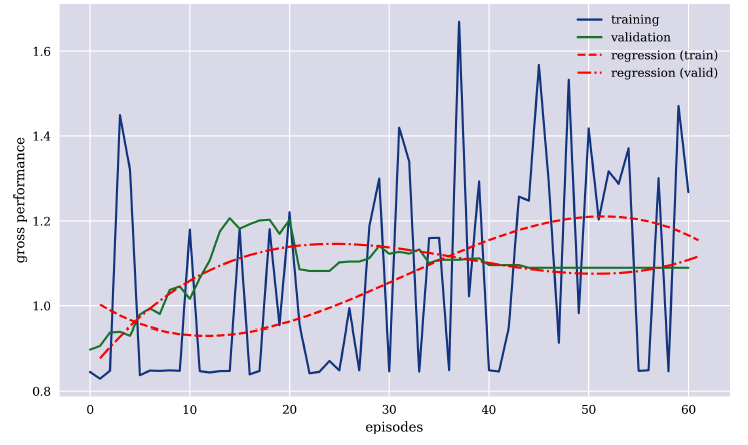

## 8.4 实验总结：强化学习算法的编写流程

第八部分涉及到两个齐全的大类：Improved_Finance和FQLAgent，分别用于模拟更加真实的金融环境和强化学习环境。在这里，我们总结一下强化学习算法的编写流程和注意事项。

在Improved_Finance类中，首先在构造函数<font color=#FF9900>\_\_init\_\_()</font>中定义了金融环境中需要的变量，如股票、外汇代码symbol，所选特征features, 滑动窗口大小window, 滞后阶数lags，杠杆率legerage, 以及训练集和验证集分隔索引等，总之和金融、交易相关的变量都应在构造函数中完成，以备接下来训练和定义状态使用。获取数据_get_data()函数和准备数据_prepare_data()综合处理了一下获取到的数据，目的是为了在获取状态函数_get_state()<font color=#FF9900>_get_state()</font>执行后，能够返回系统的状态。由于系统的状态用数组np.array表示，需要格外注意返回格式。（函数和方法名称混用）

比较重要的是<font color=#FF9900> reset()</font>重置状态和<font color=#FF9900>step()</font>时间步长函数。<font color=#FF9900> reset()</font>函数将在每一回合开始时运行，重置所有奖励treward类变量，或其他需要每一回合需要重置的变量，返回当前状态。<font color=#FF9900>step()</font>是每次执行时间步长后需要做的动作，计算回报以及其他相关的绩效衡量指标，如accucacy,performance, average performance等等；同时需要在<font color=#FF9900>step()</font>函数中指明如果回合失败即done==True时，应该满足的条件，函数返回四元组或包含下一状态的五元组。

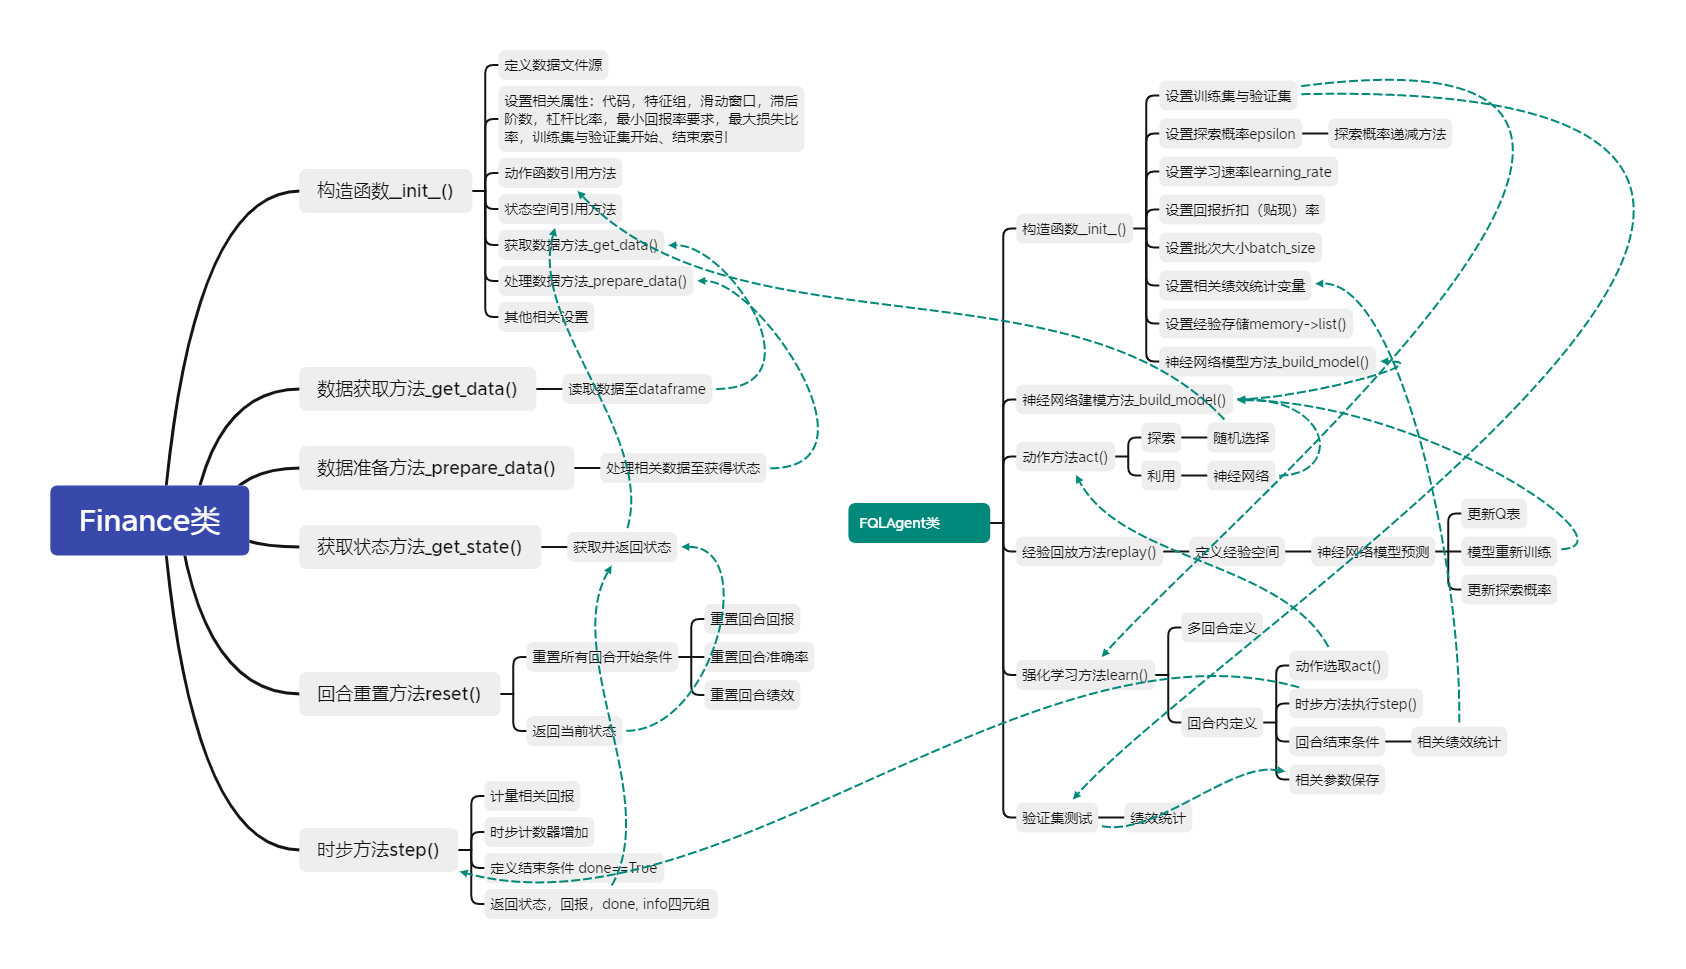

FQLAgent类的主要作用是定义强化学习中的环境交互的过程。首先在构造函数<font color=#FF9900>\_\_init\_\_()</font>中指明相关参数，如探索概率epsilon，机器学习模型学习速率learning_rate，批次大小batch_size，回报折扣率gamma 等等。用到的神经网络模型在<font color=#FF9900> \_build\_model()</font>方法中体现，注意尽量包含过拟合处理，神经网络搭建需要对Keras或PyTorch非常熟悉。动作方法<font color=#FF9900> act()</font>需要包含带有探索和利用的机制。

FQLAgent类的核心是<font color=#FF9900> replay()</font>和<font color=#FF9900> learn()</font>方法。经验回放函数<font color=#FF9900> replay()</font>在<font color=#FF9900> learn()</font>中会被调用，注意Q学习的公式使用。<font color=#FF9900> learn()</font>函数需要接收总回合数，作为最外层循环出现，每一回合都需要调用状态重置函数<font color=#FF9900> reset()</font>，进行状态展平给神经网络（如果需要）。在每一回合中，调用动作获取函数<font color=#FF9900> act()</font>将获取Q表中具有最大值的动作或随机探索，使用<font color=#FF9900> step()</font>时间步长函数接收动作并返回四元组或五元组。同时指定如果回合失败(done==True)时，相关绩效输出。最后调用经验回放，重新训练模型以供下次使用。

如是，即可完成环境定义以及强化学习算法的编写。以上算法的可适用性非常强，可以根据自身需要扩展到任何有关状态-动作Q值的优化，从而优化交易策略。

---

# 9. 总结与深度阅读


强化学习是一种十分吸引人的机器学习方法，通过智能体不断与环境进行交互，并根据经验调整其策略来最大化其所有奖励的累积值。相比其他机器学习方法，强化学习更接近生物学习的本质，可以应对多种复杂的场景，从而更接近通用人工智能系统的目标。

强化学习和监督学习的区别在于：

    1）强化学习的样本通过不断与环境进行交互产生，即试错学习，而监督学习的样本由人工收集并标注
    2）强化学习的反馈信息只有奖励，并且是延迟的，而监督学习需要明确的指导信息（每一个状态对应的动作）

基于以上两个特点：与环境交互产生数据和最大化延迟回报，强化学习是最适合用来优化金融交易策略的机器学习算法，因为金融交易的本质就是根据市场状态做出买卖决策，目标是最大化长期收益。而人类的短视性和其他机器学习算法的过拟合性，是金融交易的最大障碍。

现代强化学习可以追溯到两个来源：一个是心理学中的行为主义理论，即有机体如何在环境给予的奖励或惩罚的刺激下，逐步形成对刺激的预期，产生能获得最大利益的习惯性行为；另一个是控制论领域的最优控制问题，即在满足一定约束条件下，寻求最优控制策略，使得性能指标取极大值或极小值。强化学习的算法非常多，大体上可以分为基于值函数的方法（包括动态规划、时序差分学习等）、基于策略函数的方法（包括策略梯度等）以及融合两者的方法。

强化学习的主要参考文献为《Reinforcement Learning: An Introduction》[Sutton et al., 2018]。在深度强化学习方面，DeepMind的Mnih et al.在2013年提出了第一个强化学习和深度学习结合的模型：深度Q 网络（DQN）[Mnih et al., 2015]。虽然DQN模型相对比较简单，只是面向有限的动作空间，但依然在Atari游戏上取得了很大的成功，超越了人类水平。之后，深度强化学习开始快速发展。一些基于DQN的改进包括双Q网络[Van Hasselt et al., 2016]、优先级经验回放[Schaul et al., 2015]、决斗网络[Wang et al., 2015] 等。目前，深度强化学习更多是同时使用策略网络和值网络来近似策略函数和值函数。在演员-评论员算法的基础上，[Silver et al., 2014] 将策略梯度的思想推广到确定性的策略上，提出了确定性策略梯度（Deterministic Policy Gradient DPG）算法。




## 9.1 结语：强化学习时代正在到来

强化学习是一类一般性的学习、预测、决策方法框架。如果一个问题可以描述成或转化成序列决策问题，可以对状态、动作、奖赏进行定义，那么强化学习很可能可以帮助解决这个问题。强化学习有可能帮助自动化、最优化手动设计的策略。强化学习考虑序列问题，具有长远眼光，考虑长期回报；而监督学习一般考虑一次性的问题，关注短期效益，考虑即时回报。强化学习的这种长远眼光对很多问题找到最优解非常关键。比如，在最短路径的例子中，如果只考虑最近邻居节点，则可能无法找到最短路径；金融投资中，如果只考虑近期回报，可能会导致亏损严重。

自然科学及工程的问题，一般比较客观，有标准答案，容易评估。如果有模型、比较准确的仿真或大量数据，强化学习/机器学习就有希望解决这些问题，谷歌的AlphaGo是这种情况。组合优化、运筹学、最优控制、药学、化学、基因等方向，基本符合这种情况。社会科学及艺术问题，一般包含人的因素，会受心理学、行为科学等影响，一般比较主观，不一定有标准答案，也不一定容易评估。游戏设计及评估、教育等基本符合这种情况。内在动机等心理学概念为强化学习与社会科学及艺术之间搭建了联系的桥梁。

深度学习和强化学习分别于2013年和2017年被《麻省理工学院科技评论》评为当年10项突破性技术之一。深度学习已经被广泛应用。强化学习会在实际应用场景中发挥越来越重要的作用。强化学习已经被成功应用于游戏、推荐系统等领域，如我们的例子所示，它也已经成功应用于量化金融中。目前，强化学习可能还没有被广泛应用于某些场景的产品和服务中；我们也很可能需要对不同情况做不同的分析。不过，如果考虑长期回报，现在很可能是培养、教育、引领强化学习市场的绝佳时机。我们会看到强化学习大放异彩。

---

# 10. 参考文献

斯坦福博士课程教材：Foundations of Reinforcement Learning with applications in Finance. 
https://stanford.edu/~ashlearn/RLForFinanceBook/book.pdf

周志华(2016). 机器学习. 清华大学出版社.

Sutton, R. S. and Barto, A. G. (2018). Reinforcement Learning: An Introduction (2nd Edition). MIT Press.

Li, Y. (2017). Deep Reinforcement Learning: An Overview. ArXiv.

Yves Hilpisch (2020). Artificial Intelligence in Finance. 

CQF 2021 Lecture Notes: Reinforcement Learning